In [6]:
import pandas as pd
import os
import cv2

train_csv = 'C:/Users/cdisb/Desktop/plant-pathology-2020-fgvc7/train.csv'
df_train = pd.read_csv(train_csv, index_col=0)
class_names = list(df_train)
print(class_names)
print(df_train.shape)
df_train.head()


['healthy', 'multiple_diseases', 'rust', 'scab']
(1821, 4)


,healthy,multiple_diseases,rust,scab
image_id,,,,
Train_0,0,0,0,1
Train_1,0,1,0,0
Train_2,1,0,0,0
Train_3,0,0,1,0
Train_4,1,0,0,0


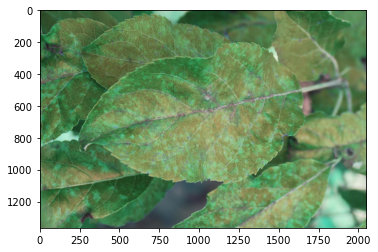

In [5]:
import matplotlib.pyplot as plt
pathTest = 'C:/Users/cdisb/Desktop/plant-pathology-2020-fgvc7/images'
images = []
for filename in os.listdir(pathTest):
    img = cv2.imread(os.path.join(pathTest,filename))
    if img is not None:
        images.append(img)

example_image = images[3]
plt.figure()
plt.imshow(example_image)
plt.show()

In [7]:
import tensorflow as tf
batch_size = 64
img_height = 180
img_width = 180
data_dir = 'C:/Users/cdisb/Desktop/plant-pathology-2020-fgvc7/Train1'
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  color_mode='rgb',
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1821 files belonging to 2 classes.
Using 1457 files for training.


In [8]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1821 files belonging to 2 classes.
Using 364 files for validation.


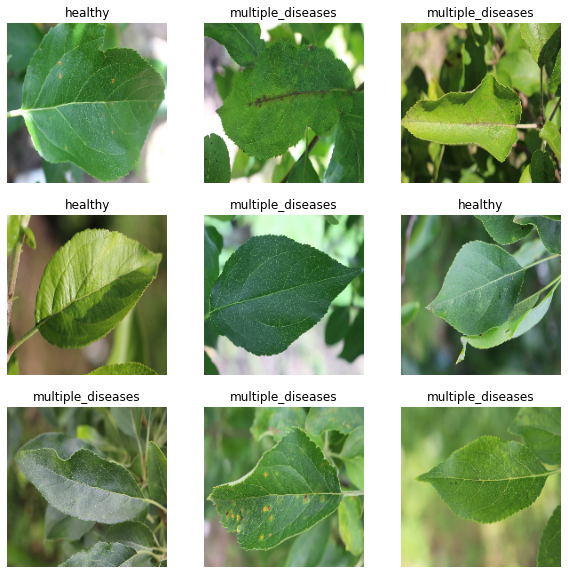

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"),cmap="gray")
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [9]:
num_classes = 4

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [10]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(loss=loss_fn,
              optimizer='rmsprop',
              metrics=['accuracy'])

In [11]:
h = model.fit(train_ds,validation_data=val_ds,epochs=15)

Epoch 1/15
23/23 [==============================] - 22s 932ms/step - loss: 1.0152 - accuracy: 0.4791 - val_loss: 0.7464 - val_accuracy: 0.5082
Epoch 2/15
23/23 [==============================] - 22s 940ms/step - loss: 0.7234 - accuracy: 0.4859 - val_loss: 0.6960 - val_accuracy: 0.5082
Epoch 3/15
23/23 [==============================] - 23s 970ms/step - loss: 0.7414 - accuracy: 0.4674 - val_loss: 0.7230 - val_accuracy: 0.5082
Epoch 4/15
23/23 [==============================] - 22s 939ms/step - loss: 0.7111 - accuracy: 0.4962 - val_loss: 0.7094 - val_accuracy: 0.4918
Epoch 5/15
23/23 [==============================] - 22s 937ms/step - loss: 0.6990 - accuracy: 0.5182 - val_loss: 0.7240 - val_accuracy: 0.4918
Epoch 6/15
23/23 [==============================] - 22s 946ms/step - loss: 0.7093 - accuracy: 0.5285 - val_loss: 0.7011 - val_accuracy: 0.4918
Epoch 7/15
23/23 [==============================] - 22s 945ms/step - loss: 0.7257 - accuracy: 0.5786 - val_loss: 0.7690 - val_accuracy: 0.4890

In [84]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.144])

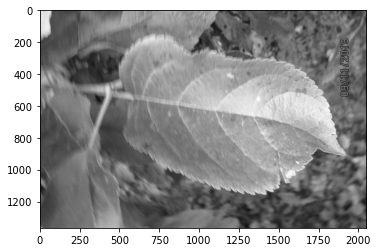

In [94]:
example_image = gray
plt.figure()
plt.imshow((example_image),cmap="gray")
plt.show()

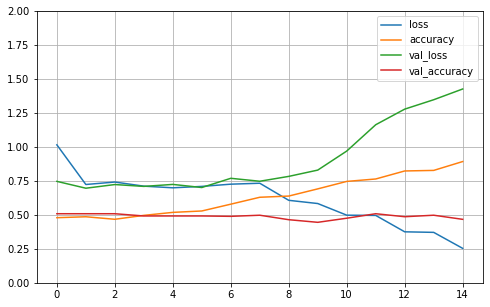

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(h.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 2) 
plt.show()

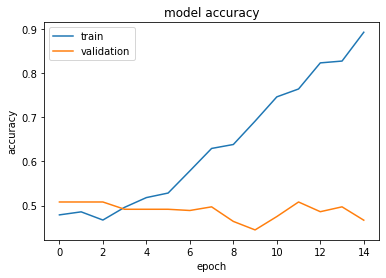

In [15]:
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

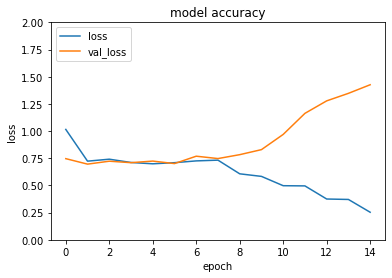

In [16]:
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'], loc='upper left')
plt.gca().set_ylim(0, 2) 
plt.show()

| Model| Training Loss| Training Accuracy  |   Validation Loss | Validation Accuracy     | Training Time| Optimizer| EpochSize|
|------|--------------|--------------------|-------------------|-------------------------|--------------|----------|----------|
|Model1|  0.6899      |      0.5429        |       0.6970      |      0.4698             |      30s     |    adam  |    10    |
|Model2| 0.3398       |     0.8524         |     1.2494        |      0.4918             |     168s     |  rmsprop |    15    |
|Model3| 0.1819       |     0.9341         |     1.7725        |      0.5165             |     166s     |  adam    |    15    |
|Model4| 0.1023       |     0.9623         |     2.5705        |      0.5302             |     333s     |  adam    |    15    |
|Model5| 0.2535       |     0.8922         |     1.4261        |      0.4670             |     335s     |  rmsprop |    15    |



Conclusion : 
 
 In the 5 different models we used, we reached the highest training accuracy value of 0.9623 in Model 4. 
 In this model, we used   the 'adam' optimizer with 15 epoch sizes. The training time value of this model is 333s.
 The lowest accuracy value is in Model 1 with 0.5429. The optimizer in this model was 'adam'. The training time value was 30s.